In [1]:
import os
import pandas as pd
import numpy as np
from nilearn import image, input_data
from statsmodels.tsa.stattools import grangercausalitytests
import sys
import nibabel as nib

# Import your parameters
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0, curr_dir)
import ptoc_params as params

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
raw_dir = params.raw_dir
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
subs = ['sub-025']  # Update this list as needed
rois = ['pIPS', 'LO']  # We'll analyze the relationship between these two ROIs
hemispheres = ['left', 'right']
run_num = 3
runs = list(range(1, run_num + 1))
run_combos = [[rn1, rn2] for rn1 in range(1, run_num + 1) for rn2 in range(rn1 + 1, run_num + 1)]

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Set the 'sub' column as the index
df.set_index('sub', inplace=True)

# Create a boxplot
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Distribution of GCA values across ROI pairs')
plt.ylabel('GCA value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{results_dir}/gca/boxplot_roi_pairs.png")
plt.close()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GCA values')
plt.tight_layout()
plt.savefig(f"{results_dir}/gca/heatmap_roi_pairs.png")
plt.close()

# Calculate and print summary statistics
summary = df.describe()
print("Summary Statistics:")
print(summary)

# Save summary statistics to a file
summary.to_csv(f"{results_dir}/gca/summary_statistics.csv")

print(f"Visualizations and summary statistics have been saved to {results_dir}/gca/")

Summary Statistics:
       lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
count  19.000000  19.000000  19.000000  19.000000
mean    8.143759   7.508123   1.838991   1.599623
std    11.805687   9.007378   8.118697   9.312461
min    -3.652964  -2.723258 -12.641339 -19.537321
25%     0.250833   1.374029  -0.119516  -1.075776
50%     3.470529   4.266910   0.524067   0.858832
75%    10.805221  10.915539   2.267116   4.238896
max    36.221112  33.322356  25.974030  21.792058
Visualizations and summary statistics have been saved to /user_data/csimmon2/git_repos/ptoc/results/gca/


In [16]:
def check_gca_summaries():
    for sub in subs:
        gca_file = f'{study_dir}/{sub}/ses-01/derivatives/results/gca/gca_summary.csv'
        if os.path.exists(gca_file):
            mod_time = os.path.getmtime(gca_file)
            print(f"GCA summary for {sub} last modified: {pd.to_datetime(mod_time, unit='s')}")
        else:
            print(f"GCA summary file not found for {sub}")

check_gca_summaries()

GCA summary for sub-025 last modified: 2024-09-06 03:15:11
GCA summary for sub-038 last modified: 2024-09-10 05:03:27
GCA summary for sub-057 last modified: 2024-09-10 06:22:08.327013376
GCA summary for sub-059 last modified: 2024-09-10 07:43:28.249566464
GCA summary for sub-064 last modified: 2024-09-10 09:02:47.847709184
GCA summary for sub-067 last modified: 2024-09-10 10:24:28.690114048
GCA summary for sub-068 last modified: 2024-09-10 11:45:00.432562432
GCA summary for sub-071 last modified: 2024-09-10 13:07:08.442219776
GCA summary for sub-083 last modified: 2024-09-10 14:23:36.095749120
GCA summary for sub-084 last modified: 2024-09-10 15:42:37.074509056
GCA summary for sub-085 last modified: 2024-09-10 16:59:52.150503168
GCA summary for sub-087 last modified: 2024-09-10 18:21:29.462049536
GCA summary for sub-088 last modified: 2024-09-10 19:43:34.150638336
GCA summary for sub-093 last modified: 2024-09-10 21:02:42.949566976
GCA summary for sub-094 last modified: 2024-09-10 22:1

In [19]:
import os
import pandas as pd
import numpy as np

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'

# List of subjects
subs = ['sub-025','sub-038','sub-057','sub-059','sub-064','sub-067','sub-068','sub-071',
        'sub-083', 'sub-084', 'sub-085', 'sub-087', 'sub-088', 'sub-093', 'sub-094', 'sub-095',
        'sub-096', 'sub-097', 'sub-107']

# List of ROI pairs
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']

# Initialize the results dataframe
results_df = pd.DataFrame(columns=['sub'] + roi_pairs)

for sub in subs:
    sub_dir = f'{study_dir}/{sub}/ses-01/'
    gca_file = f'{sub_dir}/derivatives/results/gca/gca_summary.csv'
    if not os.path.exists(gca_file):
        print(f"GCA summary file not found for subject {sub}")
        continue
    sub_data = pd.read_csv(gca_file)
    print(f"Data for {sub}:")
    print(sub_data.head())
    
    sub_dir = f'{study_dir}/{sub}/ses-01/'
    gca_file = f'{sub_dir}/derivatives/results/gca/gca_summary.csv'
    
    if not os.path.exists(gca_file):
        print(f"GCA summary file not found for subject {sub}")
        continue
    
    sub_data = pd.read_csv(gca_file)
    
    # Initialize a dictionary to store the results for this subject
    sub_results = {'sub': sub}
    
    for pair in roi_pairs:
        origin, target = pair.split('-')
        
        # Filter the data for this ROI pair
        pair_data = sub_data[(sub_data['origin'] == origin) & (sub_data['target'] == target)]
        
        if pair_data.empty:
            print(f"No data found for ROI pair {pair} in subject {sub}")
            sub_results[pair] = np.nan
        else:
            # Calculate the mean f_diff across all folds for this ROI pair
            mean_f_diff = pair_data['f_diff'].mean()
            sub_results[pair] = mean_f_diff
    
    # Append this subject's results to the dataframe
    results_df = results_df.append(sub_results, ignore_index=True)

# Save the results
output_file = f'{results_dir}/gca/subject_roi_pair_summary.csv'
if os.path.exists(output_file):
    print(f"Existing file found. Last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")
results_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")
print(f"New file last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")

# Display the first few rows of the results
print(results_df.head())

if os.path.exists(output_file):
    old_data = pd.read_csv(output_file)
    print("Old data:")
    print(old_data.head())
    print("New data:")
    print(results_df.head())
    if old_data.equals(results_df):
        print("No changes detected in the data")
    else:
        print("Changes detected in the data")

Data for sub-025:
       sub  fold task origin target     f_diff
0  sub-025     0  loc  lpIPS    lLO  -0.812932
1  sub-025     0  loc  lpIPS    rLO   0.577299
2  sub-025     0  loc  rpIPS    lLO  -3.378726
3  sub-025     0  loc  rpIPS    rLO  -3.748401
4  sub-025     1  loc  lpIPS    lLO  49.585467
Data for sub-038:
       sub  fold task origin target     f_diff
0  sub-038     0  loc  lpIPS    lLO  79.427913
1  sub-038     0  loc  lpIPS    rLO  11.924065
2  sub-038     0  loc  rpIPS    lLO   2.860228
3  sub-038     0  loc  rpIPS    rLO  -0.521673
4  sub-038     1  loc  lpIPS    lLO  27.482634
Data for sub-057:
       sub  fold task origin target     f_diff
0  sub-057     0  loc  lpIPS    lLO  10.038275
1  sub-057     0  loc  lpIPS    rLO  44.777557
2  sub-057     0  loc  rpIPS    lLO  -6.051784
3  sub-057     0  loc  rpIPS    rLO   0.067367
4  sub-057     1  loc  lpIPS    lLO  -8.931559
Data for sub-059:
       sub  fold task origin target     f_diff
0  sub-059     0  loc  lpIPS    lLO

/tmp/ipykernel_19565/169453087.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_19565/169453087.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_19565/169453087.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_19565/169453087.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_19565/169453087.py:58: FutureWarning: The

Existing file found. Last modified: 2024-09-11 19:09:08.038594816
Results saved to /user_data/csimmon2/git_repos/ptoc/results/gca/subject_roi_pair_summary.csv
New file last modified: 2024-09-11 19:09:36.422476800
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.179421
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015322   3.283093   1.859058   4.341189
Old data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.179421
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015322   3.283093   1.859058   4.341189
New data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.1794

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import os

def analyze_gca_results(input_file, output_file, p_threshold=0.05):
    # Read the CSV file
    df = pd.read_csv(input_file)
    
    print(f"Input file last modified: {pd.to_datetime(os.path.getmtime(input_file), unit='s')}")
    print("First few rows of input data:")
    print(df.head())
    
    # Define the ROI pairs we're interested in
    roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
    
    results = []
    for pair in roi_pairs:
        # Perform Wilcoxon signed-rank test comparing to 0
        statistic, p_value = stats.wilcoxon(df[pair], zero_method="wilcox")
        
        # Calculate effect size (r = Z / sqrt(N))
        effect_size = statistic / np.sqrt(len(df))
        
        # Determine significance
        significant = p_value < p_threshold
        
        # Split the pair into origin and target
        origin, target = pair.split('-')
        
        results.append({
            'origin': origin,
            'target': target,
            'mean_f_diff': np.mean(df[pair]),
            'std_f_diff': np.std(df[pair], ddof=1),
            'W_statistic': statistic,
            'p_value': p_value,
            'effect_size': effect_size,
            'significant': significant
        })
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort results
    results_df = results_df.sort_values(['origin', 'target'])
    
    # Save results
    results_df.to_csv(output_file, index=False)
    
    return results_df

# Usage
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"
output_file = f"{results_dir}/gca/gca_results_with_stats.csv"

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Run the analysis
results = analyze_gca_results(input_file, output_file)

# Print results
print("\nAnalysis results:")
print(results)

print(f"\nResults saved to: {output_file}")
print(f"Output file last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")

Input file last modified: 2024-09-11 19:09:36.422476800
First few rows of input data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.179421
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015322   3.283093   1.859058   4.341189

Analysis results:
  origin target  mean_f_diff  std_f_diff  W_statistic   p_value  effect_size  \
0  lpIPS    lLO     8.143759   11.805687         21.0  0.001694     4.817730   
1  lpIPS    rLO     7.508123    9.007378         10.0  0.000164     2.294157   
2  rpIPS    lLO     1.838991    8.118697         57.0  0.133621    13.076697   
3  rpIPS    rLO     1.599623    9.312461         66.0  0.257927    15.141438   

   significant  
0         True  
1         True  
2        False  
3        False  

Results saved to: /user_data/csimmon2/git_repos/ptoc/results/gca/gca_results_w

Input file last modified: 2024-09-11 19:09:36.422476800
First few rows of input data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.179421
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015322   3.283093   1.859058   4.341189

Main Effect Analysis:
Left Hemisphere Mean: 15.6519
Right Hemisphere Mean: 3.4386
T-statistic: 3.5926
P-value: 0.0021


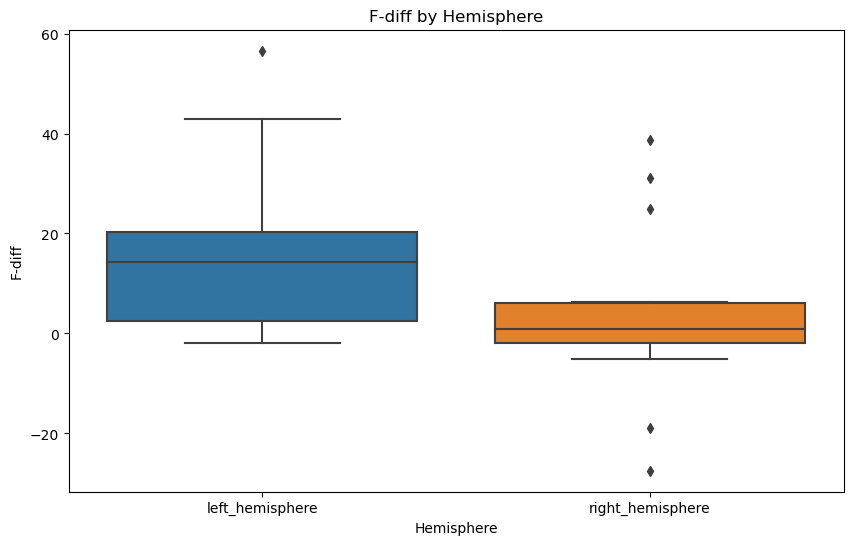

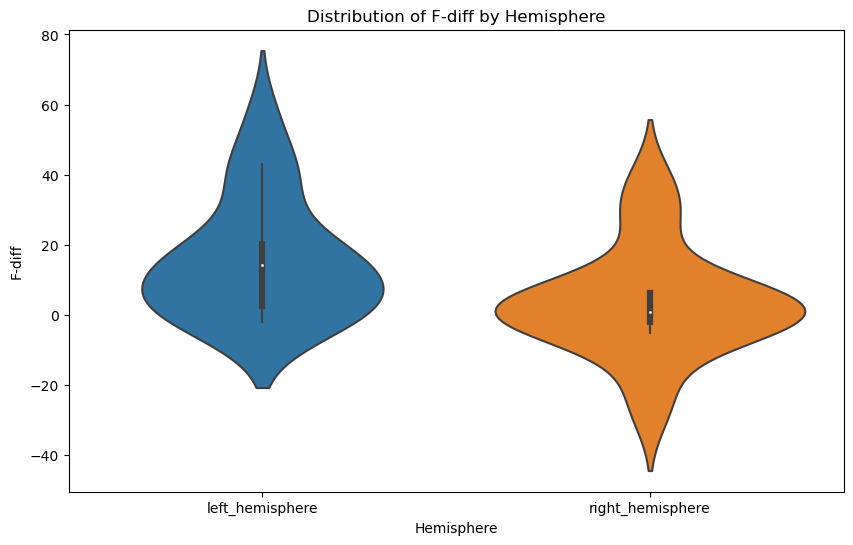


Wilcoxon Signed-Rank Test:
W-statistic: 21.0000
P-value: 0.0017

Effect Size:
Cohen's d: 0.8242


In [23]:
##main effect by hemisphere:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"
df = pd.read_csv(input_file)

print(f"Input file last modified: {pd.to_datetime(os.path.getmtime(input_file), unit='s')}")
print("First few rows of input data:")
print(df.head())

# Combine left and right hemisphere data
df['left_hemisphere'] = df['lpIPS-lLO'] + df['lpIPS-rLO']
df['right_hemisphere'] = df['rpIPS-lLO'] + df['rpIPS-rLO']

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(df['left_hemisphere'], df['right_hemisphere'])

print("\nMain Effect Analysis:")
print(f"Left Hemisphere Mean: {df['left_hemisphere'].mean():.4f}")
print(f"Right Hemisphere Mean: {df['right_hemisphere'].mean():.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Create a box plot to visualize the difference
plt.figure(figsize=(10, 6))
data_to_plot = pd.melt(df[['left_hemisphere', 'right_hemisphere']], 
                       var_name='Hemisphere', value_name='F-diff')
sns.boxplot(x='Hemisphere', y='F-diff', data=data_to_plot)
plt.title('F-diff by Hemisphere')
plt.show()

# Create a violin plot for a more detailed view of the distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hemisphere', y='F-diff', data=data_to_plot)
plt.title('Distribution of F-diff by Hemisphere')
plt.show()

# Perform Wilcoxon signed-rank test (non-parametric alternative to paired t-test)
w_statistic, w_p_value = stats.wilcoxon(df['left_hemisphere'], df['right_hemisphere'])

print("\nWilcoxon Signed-Rank Test:")
print(f"W-statistic: {w_statistic:.4f}")
print(f"P-value: {w_p_value:.4f}")

# Effect size calculation (Cohen's d for paired samples)
d = (df['left_hemisphere'] - df['right_hemisphere']).mean() / \
    (df['left_hemisphere'] - df['right_hemisphere']).std()

print("\nEffect Size:")
print(f"Cohen's d: {d:.4f}")

First few rows of the data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.179421
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015322   3.283093   1.859058   4.341189

Column names and data types:
sub           object
lpIPS-lLO    float64
lpIPS-rLO    float64
rpIPS-lLO    float64
rpIPS-rLO    float64
dtype: object


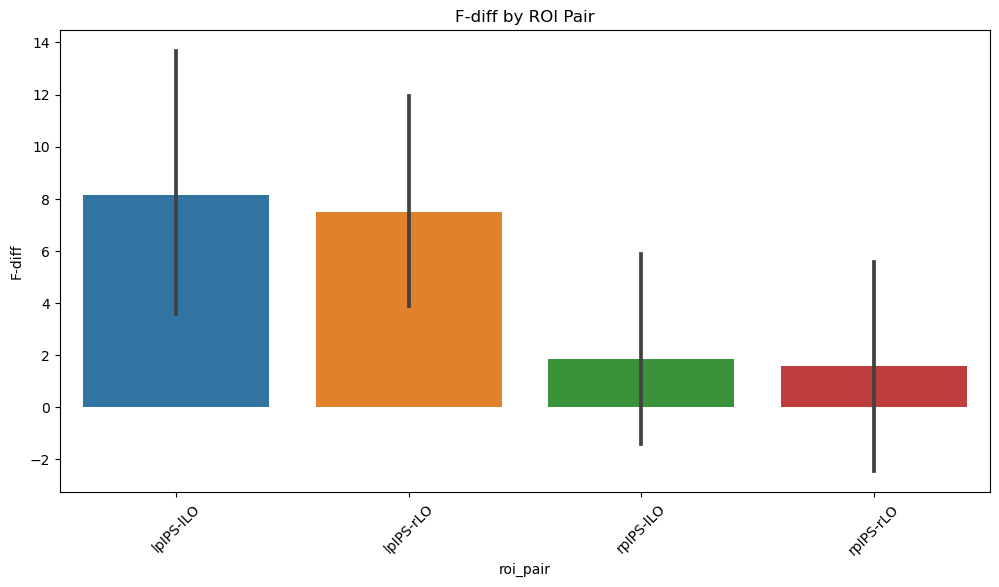

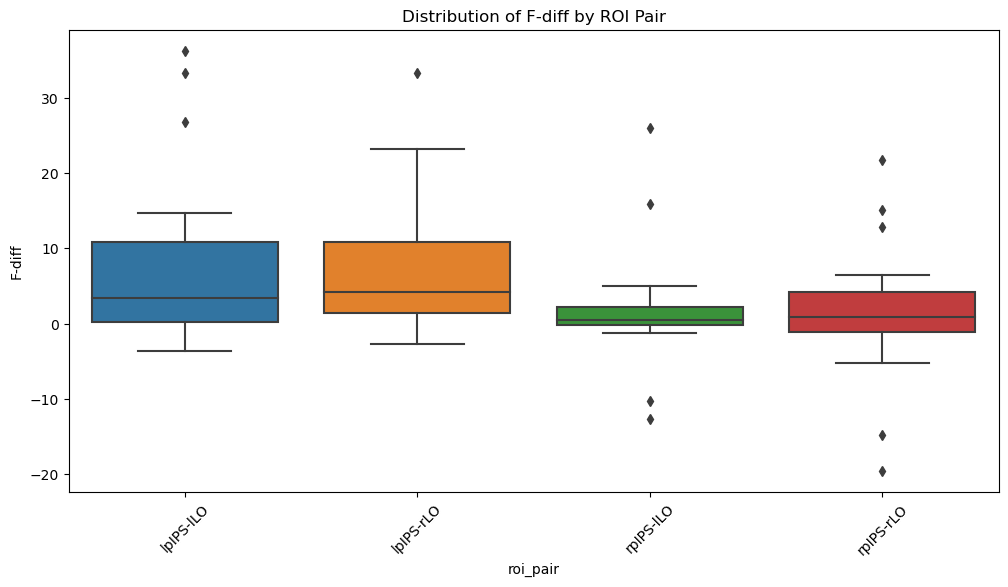

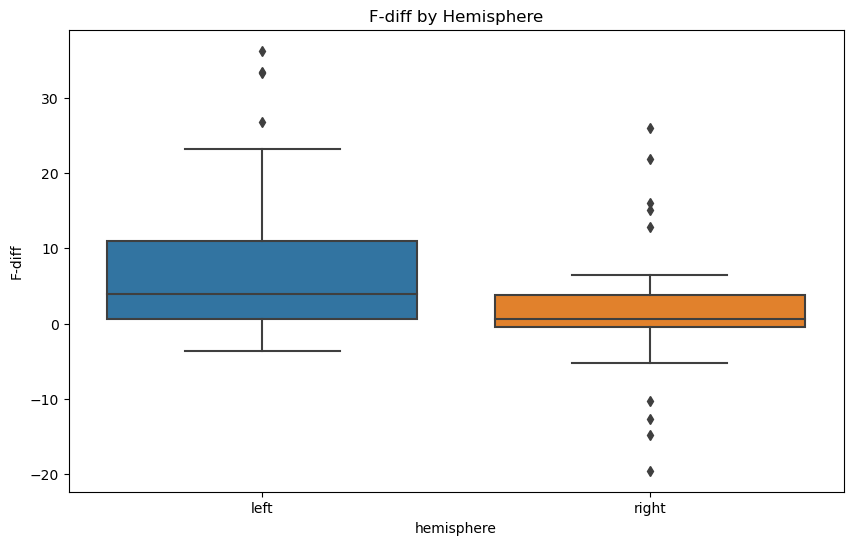


Summary Statistics:
               mean    median        std        min        max
roi_pair                                                      
lpIPS-lLO  8.143759  3.470529  11.805687  -3.652964  36.221112
lpIPS-rLO  7.508123  4.266910   9.007378  -2.723258  33.322356
rpIPS-lLO  1.838991  0.524067   8.118697 -12.641339  25.974030
rpIPS-rLO  1.599623  0.858832   9.312461 -19.537321  21.792058

Hemisphere Summary Statistics:
                mean    median        std        min        max
hemisphere                                                     
left        7.825941  3.868719  10.362310  -3.652964  36.221112
right       1.719307  0.616449   8.617985 -19.537321  25.974030

Summary statistics saved to: /user_data/csimmon2/git_repos/ptoc/results/gca/gca_summary_stats.csv


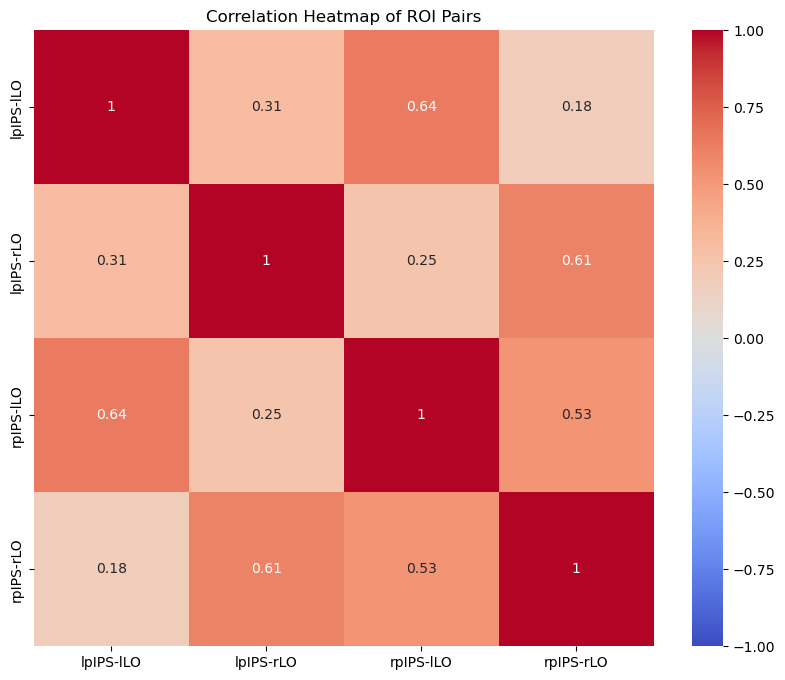


Analysis complete. Check the output and saved files.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to your CSV file
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
gca_results_path = f"{results_dir}/gca/subject_roi_pair_summary.csv"

# Read the CSV file
results = pd.read_csv(gca_results_path)

# Print the first few rows to verify the data
print("First few rows of the data:")
print(results.head())

# Print column names and data types
print("\nColumn names and data types:")
print(results.dtypes)

# Reshape the data
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
results_melted = pd.melt(results, id_vars=['sub'], value_vars=roi_pairs, var_name='roi_pair', value_name='f_diff')
results_melted['hemisphere'] = results_melted['roi_pair'].apply(lambda x: 'left' if x.startswith('l') else 'right')

# Create a bar plot of f_diff for each ROI pair
plt.figure(figsize=(12, 6))
sns.barplot(x='roi_pair', y='f_diff', data=results_melted)
plt.title('F-diff by ROI Pair')
plt.ylabel('F-diff')
plt.xticks(rotation=45)
plt.show()

# Create a box plot of f_diff for each ROI pair
plt.figure(figsize=(12, 6))
sns.boxplot(x='roi_pair', y='f_diff', data=results_melted)
plt.title('Distribution of F-diff by ROI Pair')
plt.ylabel('F-diff')
plt.xticks(rotation=45)
plt.show()

# Compare left and right hemispheres
plt.figure(figsize=(10, 6))
sns.boxplot(x='hemisphere', y='f_diff', data=results_melted)
plt.title('F-diff by Hemisphere')
plt.ylabel('F-diff')
plt.show()

# Calculate and print summary statistics
summary_stats = results_melted.groupby('roi_pair')['f_diff'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nSummary Statistics:")
print(summary_stats)

# Calculate and print hemisphere summary statistics
hemisphere_stats = results_melted.groupby('hemisphere')['f_diff'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nHemisphere Summary Statistics:")
print(hemisphere_stats)

# Save the summary statistics to a CSV file
summary_output_path = f"{results_dir}/gca/gca_summary_stats.csv"
summary_stats.to_csv(summary_output_path)
print(f"\nSummary statistics saved to: {summary_output_path}")

# Optional: If you want to create a heatmap of correlations between ROI pairs
correlation_matrix = results[roi_pairs].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of ROI Pairs')
plt.show()

print("\nAnalysis complete. Check the output and saved files.")